# Imports

In [27]:
import random
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from collections import deque
import networkx as nx
import random
import pickle

In [9]:
# Read the file and create a graph
file_path = 'facebook_combined.txt'
G = nx.Graph()

with open(file_path, 'r') as file:
    for line in file:
        edge = tuple(map(int, line.strip().split()))
        G.add_edge(*edge)

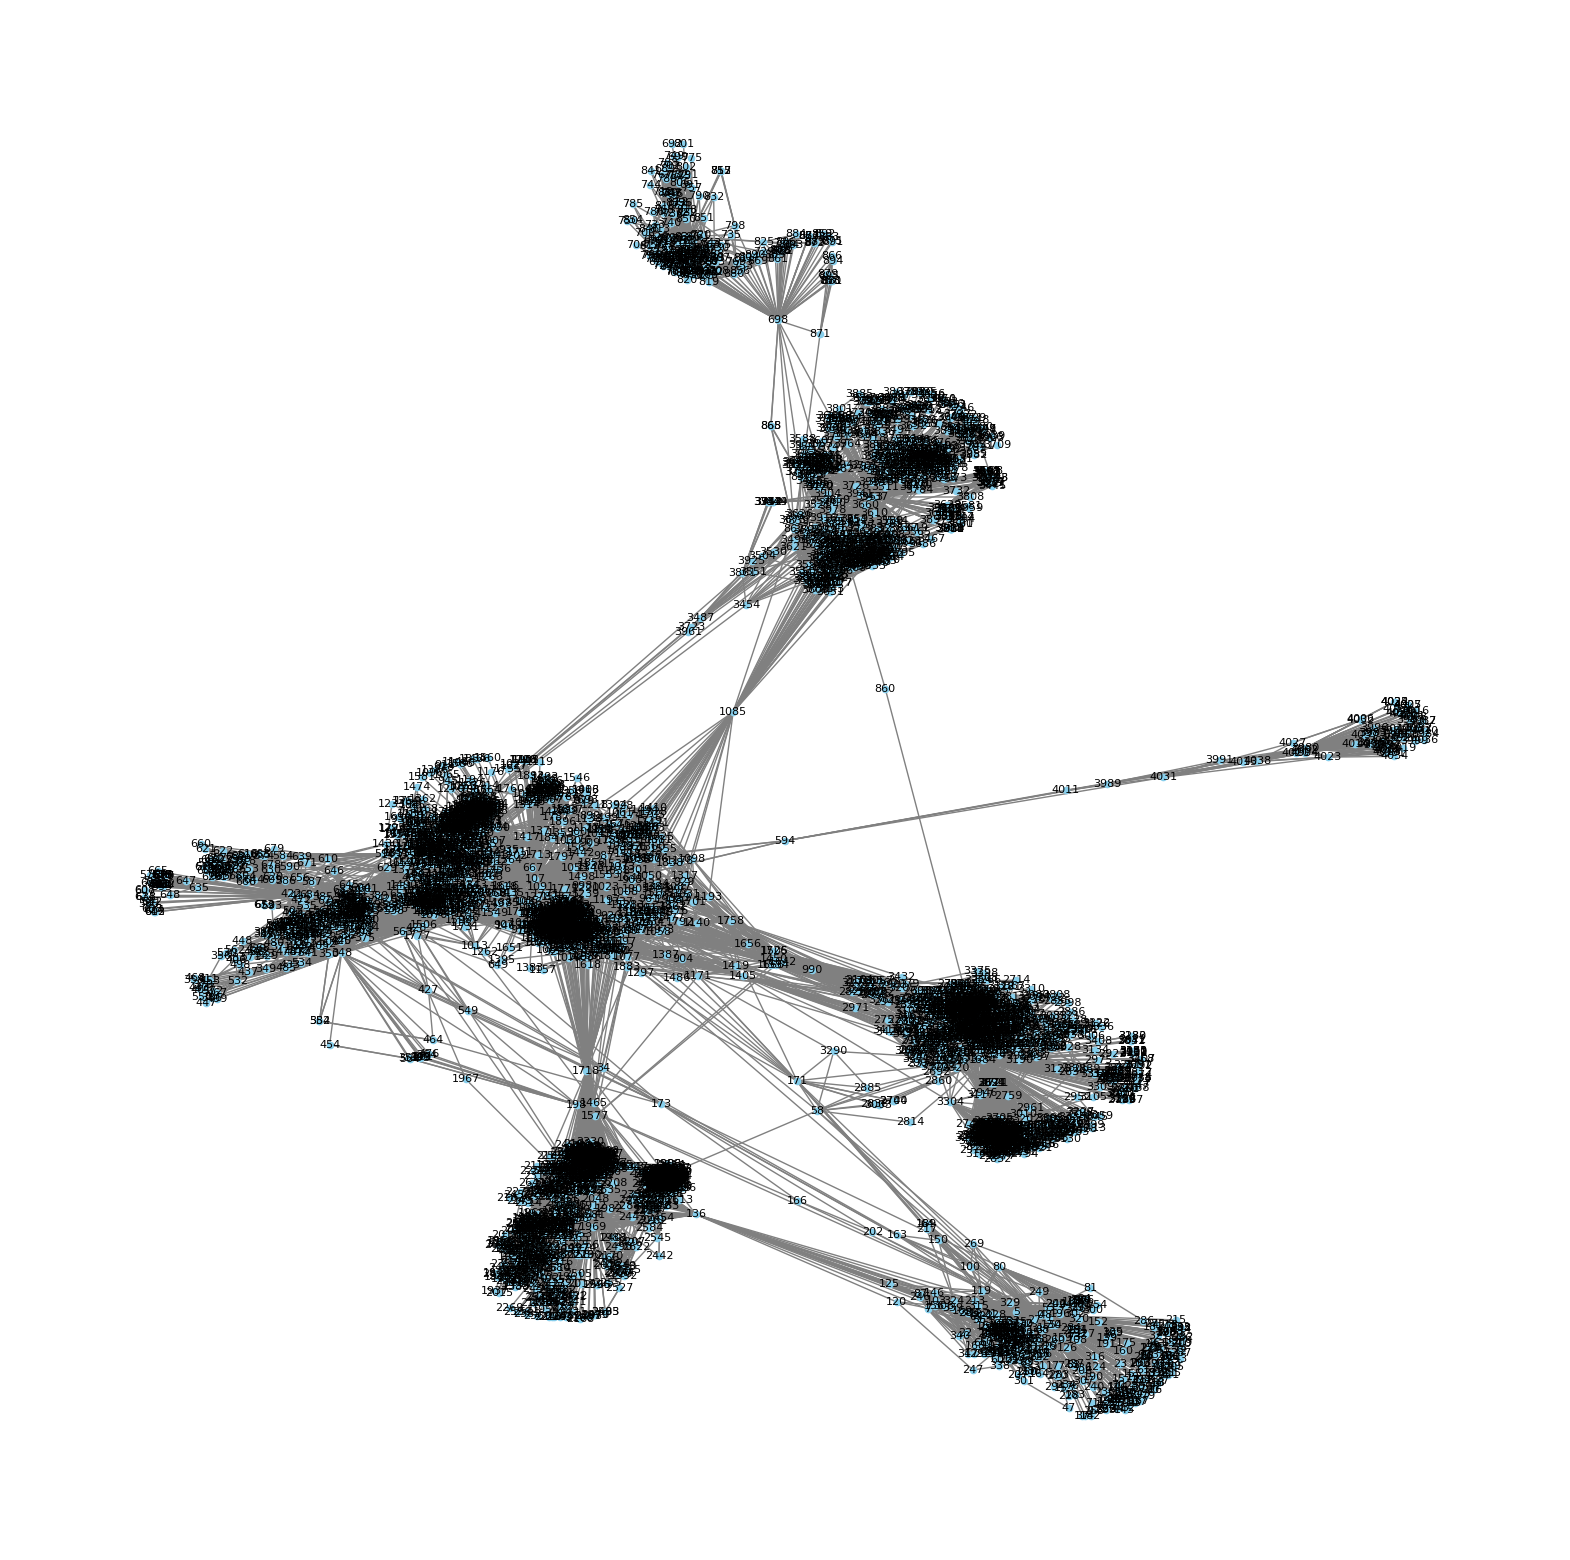

In [12]:
# Plot the graph with specified width and height
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=20, node_color='skyblue', font_size=8, edge_color='gray')
plt.show()

In [13]:
# Print the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes (people): {num_nodes}")
print(f"Number of edges (friendships): {num_edges}")

Number of nodes (people): 4039
Number of edges (friendships): 88234


In [28]:
# Function to generate realizations
def generate_realizations(graph, realization_number):
    realizations = []

    for _ in range(realization_number):
        realization = nx.Graph()
        realization.add_nodes_from(graph.nodes())

        for u, v in graph.edges():
            if np.random.rand() <= 0.1:
                realization.add_edge(u, v)

        realizations.append(realization)

    return realizations

In [29]:
# Create 10 realizations
realizations = generate_realizations(G, 10)

# Print the number of nodes and edges in each realization
for i, realization in enumerate(realizations):
    num_nodes = realization.number_of_nodes()
    num_edges = realization.number_of_edges()
    print(f"Realization {i + 1}: [ Number of nodes = {num_nodes}, Number of edges = {num_edges} ]")

Realization 1: [ Number of nodes = 4039, Number of edges = 8864 ]
Realization 2: [ Number of nodes = 4039, Number of edges = 8919 ]
Realization 3: [ Number of nodes = 4039, Number of edges = 8702 ]
Realization 4: [ Number of nodes = 4039, Number of edges = 8861 ]
Realization 5: [ Number of nodes = 4039, Number of edges = 8804 ]
Realization 6: [ Number of nodes = 4039, Number of edges = 8905 ]
Realization 7: [ Number of nodes = 4039, Number of edges = 8841 ]
Realization 8: [ Number of nodes = 4039, Number of edges = 8775 ]
Realization 9: [ Number of nodes = 4039, Number of edges = 8763 ]
Realization 10: [ Number of nodes = 4039, Number of edges = 8797 ]


In [30]:
# Save all realizations in a single .pkl file
with open('realizations.pkl', 'wb') as file:
    pickle.dump(realizations, file)

In [32]:
# Load realizations from the saved file
with open('realizations.pkl', 'rb') as file:
    realization_list = pickle.load(file)

In [22]:
# Function to calculate F(s) for a given set of nodes
def calculate_Fs(graph, selected_nodes):
    activated_nodes = set(selected_nodes)
    for edge in graph.edges():
        if edge[0] in activated_nodes and random.random() < 0.8:  # Probability of activation during one edge
            activated_nodes.add(edge[1])

    return len(activated_nodes)

In [37]:
# Number of nodes to select in each algorithm
NODES_TO_SELECT = 8

# Loop over each realization
for i, realization in enumerate(realization_list):
    print(f"\nRealization {i + 1}:")

    # Algorithm 1: Selecting nodes with the highest degree
    nodes_by_degree = sorted(realization.degree, key=lambda x: x[1], reverse=True)
    top_nodes_degree = [node[0] for node in nodes_by_degree[:NODES_TO_SELECT]]

    # Algorithm 2: Randomly selecting a set of nodes
    all_nodes = list(realization.nodes)
    random.shuffle(all_nodes)
    top_nodes_random = all_nodes[:NODES_TO_SELECT]

    # Calculate F(s) for each set of selected nodes
    Fs_degree = calculate_Fs(realization, top_nodes_degree)
    Fs_random = calculate_Fs(realization, top_nodes_random)

    # Print the selected nodes and F(s) values for each algorithm
    print(f"Alg 1 (Highest Degree):[ Selected nodes: {top_nodes_degree} , F(s): {Fs_degree}]")
    print(f"Alg 2 (Random Selection):[ Selected nodes: {top_nodes_random} , F(s): {Fs_random}]")


Realization 1:
Alg 1 (Highest Degree):[ Selected nodes: [107, 1912, 1684, 3437, 2347, 0, 1800, 1126] , F(s): 1118]
Alg 2 (Random Selection):[ Selected nodes: [2814, 2516, 3170, 536, 1911, 3959, 120, 573] , F(s): 100]

Realization 2:
Alg 1 (Highest Degree):[ Selected nodes: [107, 1912, 1684, 3437, 2347, 0, 1962, 1610] , F(s): 1361]
Alg 2 (Random Selection):[ Selected nodes: [56, 3598, 3291, 2732, 1867, 1983, 3009, 2366] , F(s): 209]

Realization 3:
Alg 1 (Highest Degree):[ Selected nodes: [107, 1684, 1912, 3437, 0, 1800, 2266, 1584] , F(s): 1251]
Alg 2 (Random Selection):[ Selected nodes: [1987, 1156, 124, 5, 3201, 1478, 1405, 1892] , F(s): 651]

Realization 4:
Alg 1 (Highest Degree):[ Selected nodes: [107, 1684, 1912, 3437, 1800, 0, 2131, 2542] , F(s): 1298]
Alg 2 (Random Selection):[ Selected nodes: [2961, 1876, 2539, 903, 1177, 192, 2813, 3040] , F(s): 26]

Realization 5:
Alg 1 (Highest Degree):[ Selected nodes: [107, 1684, 1912, 3437, 2347, 1888, 1352, 0] , F(s): 1216]
Alg 2 (Rando

In [66]:
def find_selected_nodes(graph, nodes):
    # Initialize the set to store the selected nodes
    result_nodes = set()

    # Iterate through each initial node in the list
    for n in nodes:
        # Breadth-First Search (BFS)
        node_queue = []  # Queue for BFS traversal
        visited_nodes = set()  # Set to keep track of visited nodes

        # Start BFS from the current initial node
        node_queue.append(n)
        visited_nodes.add(n)

        while node_queue:
            current_node = node_queue.pop(0)

            # Explore neighbors of the current node
            for neighbor in graph[current_node]:
                if neighbor not in visited_nodes:
                    # Add unvisited neighbors to the queue and mark them as visited
                    node_queue.append(neighbor)
                    visited_nodes.add(neighbor)

        # Add visited nodes from the current BFS traversal to the result set
        result_nodes = result_nodes.union(visited_nodes)

    # Return the set of all selected nodes
    return result_nodes

In [67]:
def greedy_algorithm(graph, nodes, selected_nodes, candidate_nodes, cost):
    # Find the node with the highest influence among the candidates
    best_candidate = None
    best_candidate_influence = 0

    for candidate_node in all_nodes:
        if candidate_node not in selected_nodes:
            candidate_nodes.append(candidate_node)
            influence = find_selected_nodes(graph, candidate_nodes)
            if len(influence) > best_candidate_influence:
                best_candidate_influence = len(influence)
                best_candidate = candidate_node
            candidate_nodes.remove(candidate_node)

    # Add the best candidate node to the selected nodes
    candidate_nodes.append(best_candidate)
    selected_nodes = find_selected_nodes(graph, candidate_nodes)

    # Check if we have enough nodes
    if len(candidate_nodes) == cost:
        return candidate_nodes
    else:
        return greedy_algorithm(graph, nodes, selected_nodes, candidate_nodes, cost)

In [62]:
# Execute greedy algorithm for each realization
custom_greedy_results = []

for realization in realization_list:
    all_nodes_set = set(realization.nodes())
    selected_nodes_set = set()
    candidate_nodes_list = []
    desired_cost = 8

    # Call the custom greedy algorithm
    custom_greedy_result = greedy_algorithm(realization, all_nodes_set, selected_nodes_set, candidate_nodes_list, desired_cost)

    # Append the result to the list of custom greedy results
    custom_greedy_results.append(custom_greedy_result)

In [63]:
for i in range(len(custom_greedy_results)):
    selected_nodes = find_selected_nodes(realization_list[i], custom_greedy_results[i])
    print(f"\nRealization {i + 1}:")
    print(f"Greedy Alg: [Nodes: [{custom_greedy_results[i]}], F(S): {len(selected_nodes)}]")


Realization 1:
Greedy Alg: [Nodes: [[0, 686, 3980, 3995, 8, 115, 2930, 3538]], F(S): 3127]

Realization 2:
Greedy Alg: [Nodes: [[0, 2, 3980, 689, 17, 3446, 3982, 1]], F(S): 3106]

Realization 3:
Greedy Alg: [Nodes: [[0, 14, 3980, 3561, 956, 3513, 699, 857]], F(S): 3069]

Realization 4:
Greedy Alg: [Nodes: [[34, 862, 0, 686, 3446, 2732, 3982, 32]], F(S): 3041]

Realization 5:
Greedy Alg: [Nodes: [[0, 686, 3980, 3479, 3473, 3571, 689, 1956]], F(S): 3036]

Realization 6:
Greedy Alg: [Nodes: [[0, 686, 3478, 3980, 3446, 17, 3982, 712]], F(S): 3111]

Realization 7:
Greedy Alg: [Nodes: [[0, 686, 14, 3980, 1956, 437, 78, 804]], F(S): 3128]

Realization 8:
Greedy Alg: [Nodes: [[0, 686, 58, 3536, 3539, 3479, 990, 2034]], F(S): 3099]

Realization 9:
Greedy Alg: [Nodes: [[0, 686, 3981, 369, 166, 741, 1087, 3498]], F(S): 3122]

Realization 10:
Greedy Alg: [Nodes: [[107, 0, 686, 35, 3980, 6, 702, 3562]], F(S): 3076]


In [68]:
def celf_algorithm(graph, nodes, selected_nodes, candidate_nodes, old_gains, cost):
    # Find the best node
    best_node = None
    best_influence = 0

    # Sort all nodes by their old gains
    sorted_nodes = sorted(old_gains, key=old_gains.get, reverse=True)

    # Iterate through sorted nodes
    for node in sorted_nodes:
        if node not in selected_nodes and old_gains[node] > best_influence:
            # Check node
            candidate_nodes.append(node)
            influence = find_selected_nodes(graph, candidate_nodes)
            old_gains[node] = len(influence)

            if len(influence) > best_influence:
                best_influence = len(influence)
                best_node = node

            candidate_nodes.remove(node)

    # Add the best node to selected nodes
    candidate_nodes.append(best_node)
    selected_nodes = find_selected_nodes(graph, candidate_nodes)

    # Check if we have enough nodes
    if len(candidate_nodes) == cost:
        return candidate_nodes
    else:
        return celf_algorithm(graph, nodes, selected_nodes, candidate_nodes, old_gains, cost)

In [69]:
custom_celf_results = []

for realization in realization_list:
    all_nodes_set = set(realization.nodes())
    selected_nodes_set = set()
    candidate_nodes_list = []
    old_gains_dict = {node: len(all_nodes_set) + 1 for node in all_nodes_set}
    desired_cost = 8

    # Call the custom celf algorithm
    custom_celf_result = celf_algorithm(realization, all_nodes_set, selected_nodes_set, candidate_nodes_list, old_gains_dict, desired_cost)

    # Append the result to the list of custom celf results
    custom_celf_results.append(custom_celf_result)

In [70]:
for i in range(len(custom_celf_results)):
    selected_nodes = find_selected_nodes(realization_list[i], custom_celf_results[i])
    print(f"\nRealization {i + 1}:")
    print(f"CELF Alg: [Nodes: [{custom_celf_results[i]}], F(S) - {len(selected_nodes)}]")


Realization 1:
CELF Alg: [Nodes: [[0, 686, 3980, 3995, 8, 115, 2930, 3538]], F(S) - 3127]

Realization 2:
CELF Alg: [Nodes: [[0, 2, 3980, 689, 17, 3446, 3982, 1]], F(S) - 3106]

Realization 3:
CELF Alg: [Nodes: [[0, 14, 3980, 3561, 956, 3513, 699, 857]], F(S) - 3069]

Realization 4:
CELF Alg: [Nodes: [[34, 862, 0, 686, 3446, 2732, 3982, 32]], F(S) - 3041]

Realization 5:
CELF Alg: [Nodes: [[0, 686, 3980, 3479, 3473, 3571, 689, 1956]], F(S) - 3036]

Realization 6:
CELF Alg: [Nodes: [[0, 686, 3478, 3980, 3446, 17, 3982, 712]], F(S) - 3111]

Realization 7:
CELF Alg: [Nodes: [[0, 686, 14, 3980, 1956, 437, 78, 804]], F(S) - 3128]

Realization 8:
CELF Alg: [Nodes: [[0, 686, 58, 3536, 3539, 3479, 990, 2034]], F(S) - 3099]

Realization 9:
CELF Alg: [Nodes: [[0, 686, 3981, 369, 166, 741, 1087, 3498]], F(S) - 3122]

Realization 10:
CELF Alg: [Nodes: [[107, 0, 686, 35, 3980, 6, 702, 3562]], F(S) - 3076]
